# Raw Extraction of required data 

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [10]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [2]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

# Unlabelled report, IP relabel mapping.
# with open("./../../IP_activity_relabel.csv") as f:
#     ip_activity_relabel = dict(filter(None, csv.reader(f)))
    
# Unlabelled report, RNDF predictions

In [3]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year, iso=True):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        if iso:
            cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        else:
            cal = datetime.strptime(date, "%d-%m-%Y")
        date_calculation_cache[date] = cal
    else:
        cal = date_calculation_cache[date]
    return cal

In [7]:
host_attacks = {attk: {} for attk in indexes}

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        #continue
        files.append(('./../../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    cal = make_date(day, month, year, iso=False)
                    year_num, week_num, weekday_num = cal.isocalendar()

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue

                # Relabelling unlabelled reports, if relabel exists
#                 if (attack == 'Unlabelled') and (ip in ip_activity_relabel):
#                     attack_label = ip_activity_relabel[ip]
#                 else:
#                     attack_label = attack
                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Select daily record, host independent
                key = cal
                # Initialise the holder
                if key not in host_attacks[attack_label]:
                    host_attacks[attack_label][key] = 0

                # Modify the value
                host_attacks[attack_label][key] += 1

print('Finished')

6918it [00:00, 89668.52it/s]
17198it [00:00, 171937.12it/s]

Spammers
./../../Datastore/Spammers_reports.csv
Malware
./../../Datastore/Malware_reports.csv


3190529it [00:18, 174524.46it/s]
15646it [00:00, 156383.34it/s]

Exploits
./../../Datastore/Exploits_reports.csv


201108it [00:01, 163388.61it/s]
15191it [00:00, 151875.02it/s]

Phishing
./../../Datastore/Phishing_reports.csv


2382889it [00:14, 166919.93it/s]
15327it [00:00, 153228.86it/s]

Fraudlent Services
./../../Datastore/Fraudlent Services_reports.csv


829301it [00:04, 169606.67it/s]
17340it [00:00, 173354.70it/s]

Unwanted Programs
./../../Datastore/Unwanted Programs_reports.csv


698700it [00:04, 164005.58it/s]


Unlabelled
./../../Datastore/Unlabelled_reports_0.csv


/Users/zha197/.local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
2000138it [00:12, 159175.94it/s]


./../../Datastore/Unlabelled_reports_1.csv


2000007it [00:15, 128568.01it/s]


./../../Datastore/Unlabelled_reports_2.csv


2000047it [00:13, 144365.77it/s]


./../../Datastore/Unlabelled_reports_3.csv


2000022it [00:13, 152307.74it/s]


./../../Datastore/Unlabelled_reports_4.csv


2000471it [00:14, 135491.55it/s]


./../../Datastore/Unlabelled_reports_5.csv


2000567it [00:15, 132348.33it/s]


./../../Datastore/Unlabelled_reports_6.csv


2000130it [00:13, 150596.30it/s]


./../../Datastore/Unlabelled_reports_7.csv


2000541it [00:12, 156654.87it/s]


./../../Datastore/Unlabelled_reports_8.csv


2000282it [00:12, 154137.15it/s]


./../../Datastore/Unlabelled_reports_9.csv


2000016it [00:13, 145525.58it/s]


./../../Datastore/Unlabelled_reports_10.csv


2000165it [00:12, 157130.45it/s]


./../../Datastore/Unlabelled_reports_11.csv


2000021it [00:12, 154206.45it/s]


./../../Datastore/Unlabelled_reports_12.csv


2000114it [00:12, 158090.88it/s]


./../../Datastore/Unlabelled_reports_13.csv


2000038it [00:13, 145216.44it/s]


./../../Datastore/Unlabelled_reports_14.csv


2000304it [00:13, 145622.27it/s]


./../../Datastore/Unlabelled_reports_15.csv


2000019it [00:13, 145011.06it/s]


./../../Datastore/Unlabelled_reports_16.csv


2000455it [00:13, 148764.49it/s]


./../../Datastore/Unlabelled_reports_17.csv


2000040it [00:13, 152419.70it/s]


./../../Datastore/Unlabelled_reports_18.csv


2000023it [00:12, 156293.33it/s]


./../../Datastore/Unlabelled_reports_19.csv


2000058it [00:14, 140262.15it/s]


./../../Datastore/Unlabelled_reports_20.csv


2000016it [00:13, 153388.43it/s]


./../../Datastore/Unlabelled_reports_21.csv


2000294it [00:12, 160950.09it/s]
0it [00:00, ?it/s]

./../../Datastore/Unlabelled_reports_22.csv


332782it [00:02, 159353.40it/s]

Finished


In [8]:
for attk in attack_map:
    print(attk, sum(host_attacks[attk].values()))

('Malware', 46932466)
('Phishing', 2450247)
('Exploits', 218791)
('Fraudlent Services', 1141377)
('Unwanted Programs', 895494)
('Spammers', 7620)
('Unlabelled', 0)


In [9]:
total_sum = sum([sum(host_attacks[attk].values()) for attk in host_attacks])
print total_sum
for attk in attack_map:
    print(attk, 1.0*sum(host_attacks[attk].values())/total_sum)

51645995
('Malware', 0.9087338911758792)
('Phishing', 0.04744311732206921)
('Exploits', 0.004236359469887259)
('Fraudlent Services', 0.02210000988459996)
('Unwanted Programs', 0.017339079245157346)
('Spammers', 0.00014754290240705014)
('Unlabelled', 0.0)


In [10]:
# Turn into a pandas array
df = pd.DataFrame(host_attacks)
df.fillna(0, inplace=True)
df.sort_index(ascending=True)
df['Totals'] = df.transpose().sum()

In [11]:
# Save the DataFrame
df.to_csv('ip_daily_1.csv')

# Plotting code

## Import precomputed data

In [23]:
import pandas as pd
df = pd.read_csv('ip_daily_1.csv', index_col=0)
df.index = pd.to_datetime(df.index).to_pydatetime()

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil.relativedelta

plot_properties_indexes = {
    'Unwanted Programs':{'color':'b', 'linestyle':'-', 'label':'PUP',
                         'marker':'s', 'hatch':'//'},

    'Fraudlent Services':{'color':'y', 'linestyle':'-', 'label':'Fraud. Serv.',
                          'marker':'*','hatch':'\\'},

    'Malware':{'color':'r', 'linestyle':'-', 'label':'Malware',
               'marker':'x', 'hatch':'x'},

    'Exploits':{'color':'m', 'linestyle':'-', 'label':'Exploits',
                'marker':'+', 'hatch':'+'},

    'Phishing':{'color':'g', 'linestyle':'-', 'label':'Phishing',
                'marker':'^', 'hatch':'|'},

    'Spammers':{'color':'c', 'linestyle':'-', 'label':'Spammers',
                'marker':'D', 'hatch':'\\\\'},

    'Unlabelled':{'color':'w', 'linestyle':'-', 'label':'Unlabelled',
                  'marker':'T', 'hatch':'///'},

    'Totals':{'color':'k', 'linestyle':'-', 'label':'Total',
              'marker':'o', 'hatch':''}
}

## Plot reports, daily scale

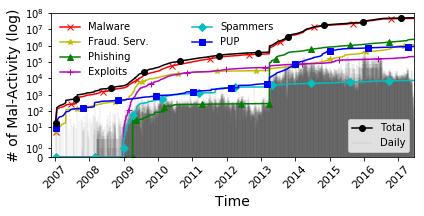

In [39]:
fig = plt.figure(figsize=(6,3.1))

# Setup tick formatters
years = mdates.YearLocator()  # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Plot the daily background lines
plt.vlines(pd.to_datetime(df.index).to_pydatetime(),
           0, df['Totals'].values, label='Daily',
           alpha=0.8, linewidth=0.1)

for attk in ['Malware', 'Fraudlent Services', 'Phishing',
             'Exploits', 'Spammers', 'Unwanted Programs', 'Totals']:
    linestyle = plot_properties_indexes[attk]['linestyle']
    color = plot_properties_indexes[attk]['color']
    label = plot_properties_indexes[attk]['label']
    marker = plot_properties_indexes[attk]['marker']
    
    plt.plot(pd.to_datetime(df.index).to_pydatetime(),
             df[attk].cumsum(), label=label,
             linestyle=linestyle,color=color,
             marker=marker,markevery=0.1)
    
plt.yscale('symlog')
plt.xlabel('Time', fontsize=14)
plt.ylabel('# of Mal-Activity (log)', fontsize=14)
plt.ylim(0, 1E8)
x_min = (pd.to_datetime(df.index).to_pydatetime()[0] -
            dateutil.relativedelta.relativedelta(days=50))
x_max = (pd.to_datetime(df.index).to_pydatetime()[-1] +
            dateutil.relativedelta.relativedelta(days=0))
plt.xlim(x_min, x_max)
plt.xticks(rotation=45, fontsize=11)


# Split Legend Code
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
offset_split = -4
final_split = -2
l1 = ax.legend(handles[:offset_split], labels[:offset_split],
               loc='upper left',frameon=False)
l2 = ax.legend(handles[offset_split:final_split], labels[offset_split:final_split],
               loc='upper center',frameon=False)
l3 = ax.legend(handles[final_split:], labels[final_split:],
               loc='lower right',frameon=True)
ax.add_artist(l2)
ax.add_artist(l1)

ax.xaxis.set_major_locator(years)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig('./figures/all_attacks_evolution.pdf',bbox_inches='tight')
plt.show()

# Plot yearly, attack proportions

We do not consider unlabelled reports as part of this plot

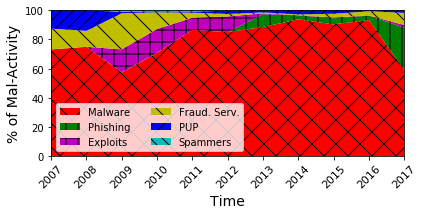

In [40]:
years = list(xrange(2007,2018))
x = years

year_totals = {year: df.loc[str(year)]['Totals'].sum() - df.loc[str(year)]['Unlabelled'].sum() for year in years}

y1 = [100.0*df.loc[str(year)]['Malware'].sum()/year_totals[year] for year in years]
y2 = [100.0*df.loc[str(year)]['Phishing'].sum()/year_totals[year]  for year in years]
y3 = [100.0*df.loc[str(year)]['Exploits'].sum()/year_totals[year]  for year in years]
y4 = [100.0*df.loc[str(year)]['Fraudlent Services'].sum()/year_totals[year]  for year in years]
y5 = [100.0*df.loc[str(year)]['Unwanted Programs'].sum()/year_totals[year]  for year in years]
y6 = [100.0*df.loc[str(year)]['Spammers'].sum()/year_totals[year]  for year in years]

labels = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
          'Unwanted Programs', 'Spammers']
plot_labels = [plot_properties_indexes[l]['label'] for l in labels]
colors = [plot_properties_indexes[l]['color'] for l in labels]
hatchs = [plot_properties_indexes[l]['hatch'] for l in labels]
1
fig, ax = plt.subplots(figsize=(6, 3.1))
stacks = ax.stackplot(x, y1, y2, y3, y4, y5, y6, labels=plot_labels, colors=colors)
for stack, hatch in zip(stacks, hatchs):
    stack.set_hatch(hatch)

plt.ylim(0,100)
plt.xlim(2007,2017)
plt.legend(loc=3, ncol=2)
plt.xticks(np.arange(2007, 2017+1, 1.0), rotation=45, fontsize=11)

plt.xlabel('Time',fontsize=14)
plt.ylabel('% of Mal-Activity',fontsize=14)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig('./figures/percentages_years_labelled.pdf')
plt.show()


# Additional Analysis

In [41]:
# Comparison of Phishing and Malware proportions in 2017
year = 2017

malware_in = df.loc[str(year)]['Malware'].sum()
phishing_in = df.loc[str(year)]['Phishing'].sum()

print(malware_in)
print(phishing_in)

print(phishing_in/malware_in)

1237970.0
603564.0
0.4875433168816692


In [42]:
# Comparison of Proportions for all classes in 2017
year = 2017
100* df.loc[str(year)].sum() / df.loc[str(year)].sum()['Totals']

Exploits                1.825440
Fraudlent Services      8.360955
Malware                59.142631
Phishing               28.834594
Spammers                0.017437
Unlabelled              0.000000
Unwanted Programs       1.818943
Totals                100.000000
dtype: float64